In [1]:
import sys
import os
from pathlib import Path
from collections import defaultdict
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import shutil
import torch


os.chdir('..')

from utils.model_factory import load_models
from utils.data_holder import DataHolder
from tasks.train_polynomial import TrainPolynomial

models = load_models(Path('results', 'polynomial'))
empty = torch.empty(0)

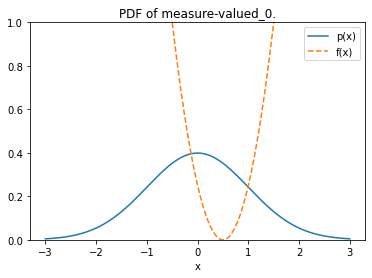

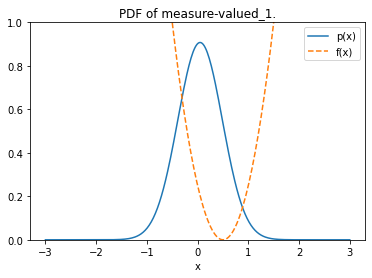

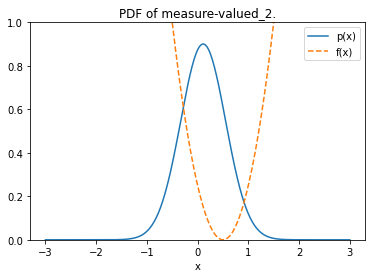

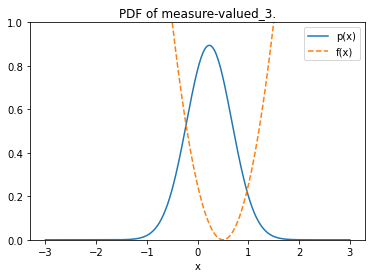

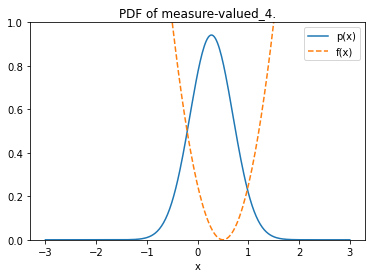

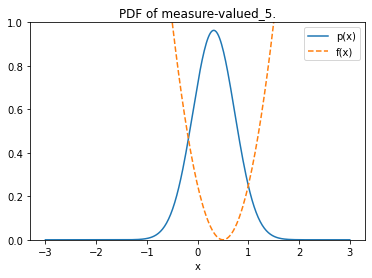

In [2]:
for path, model in models:
    if 'measure' in path.stem:
        distribution = model.encode(empty)
        x, pdf = distribution.pdf()
        plt.plot(x, pdf, label="p(x)")

        # Plot loss function
        x = torch.tensor(np.linspace(-3, 3, 200))
        plt.plot(x, TrainPolynomial.polynomial(x), linestyle='dashed', label="f(x)")

        plt.title(f"PDF of {path.stem}.")
        plt.legend()
        plt.xlabel("x")
        plt.ylim(0, 1)

        plt.show()

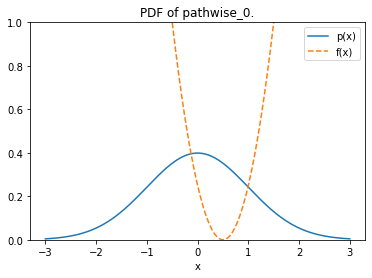

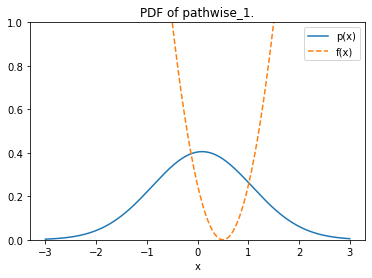

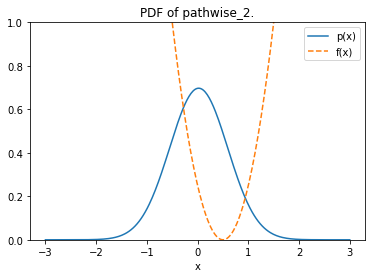

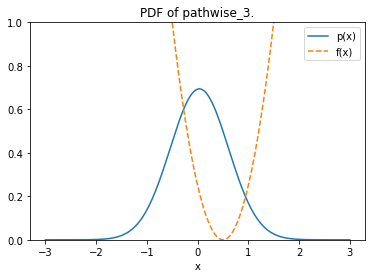

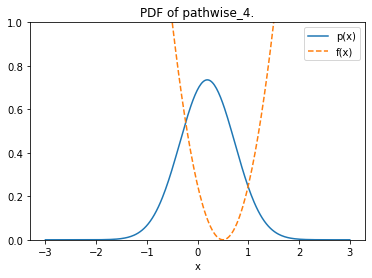

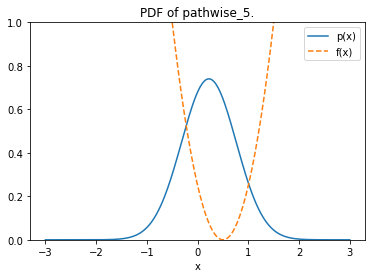

In [3]:
for path, model in models:
    if 'pathwise' in path.stem:
        distribution = model.encode(empty)
        x, pdf = distribution.pdf()
        plt.plot(x, pdf, label="p(x)")

        # Plot loss function
        x = torch.tensor(np.linspace(-3, 3, 200))
        plt.plot(x, TrainPolynomial.polynomial(x), linestyle='dashed', label="f(x)")

        plt.title(f"PDF of {path.stem}.")
        plt.legend()
        plt.xlabel("x")
        plt.ylim(0, 1)

        plt.show()

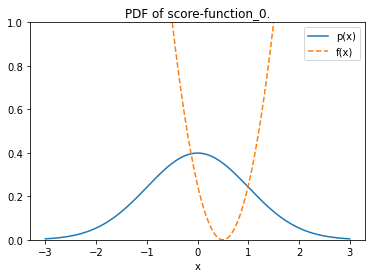

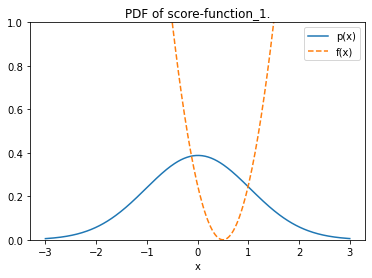

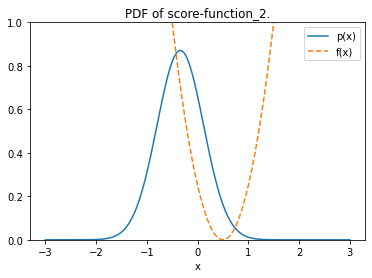

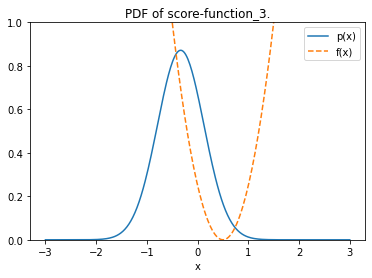

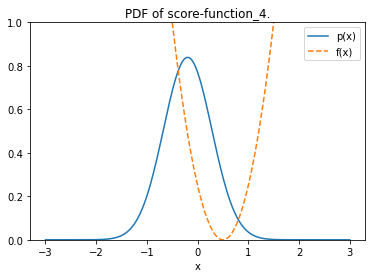

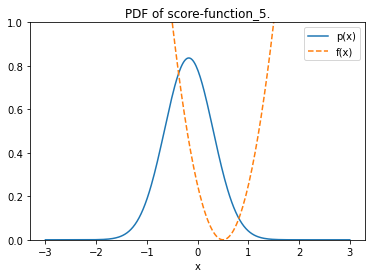

In [4]:
for path, model in models:
    if 'score' in path.stem: 
        distribution = model.encode(empty)
        x, pdf = distribution.pdf()
        plt.plot(x, pdf, label="p(x)")

        # Plot loss function
        x = torch.tensor(np.linspace(-3, 3, 200))
        plt.plot(x, TrainPolynomial.polynomial(x), linestyle='dashed', label="f(x)")

        plt.title(f"PDF of {path.stem}.")
        plt.legend()
        plt.xlabel("x")
        plt.ylim(0, 1)

        plt.show()